In [48]:
#Please ensure that you have the yfinance library installed 
#We can use yahoo finace api in this way
#!pip install yfinance

[*********************100%***********************]  2 of 2 completed


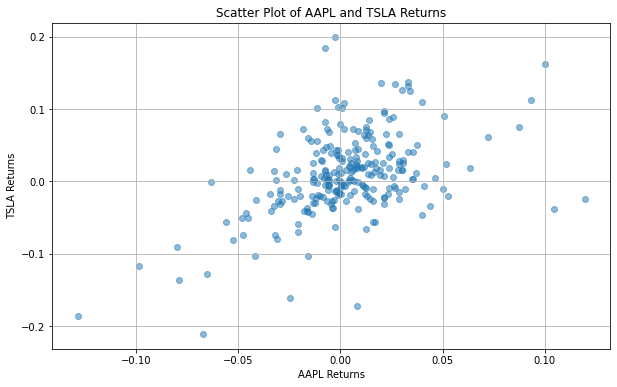

In [59]:
#1-)Scattering Returns of Two Stocks
import yfinance as yf
import matplotlib.pyplot as plt

def scatter_stock_returns(stock_symbol1, stock_symbol2, start_date, end_date):
    """
    Plots the scatter plot of returns for two stocks.
    
    Parameters:
    stock_symbol1 (str): Symbol of the first stock.
    stock_symbol2 (str): Symbol of the second stock.
    start_date (str): Start date in 'YYYY-MM-DD' format.
    end_date (str): End date in 'YYYY-MM-DD' format.
    """
    # Retrieve historical price data using yfinance
    data = yf.download([stock_symbol1, stock_symbol2], start=start_date, end=end_date)['Adj Close']

    # Calculate daily returns
    returns = data.pct_change()

    # Scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(returns[stock_symbol1], returns[stock_symbol2], alpha=0.5)
    plt.title(f'Scatter Plot of {stock_symbol1} and {stock_symbol2} Returns')
    plt.xlabel(f'{stock_symbol1} Returns')
    plt.ylabel(f'{stock_symbol2} Returns')
    plt.grid(True)
    plt.show()

# Example usage
stock1 = 'AAPL'
stock2 = 'TSLA'
start_date = '2020-01-01'
end_date = '2021-01-01'
scatter_stock_returns(stock1, stock2, start_date, end_date)


[*********************100%***********************]  2 of 2 completed


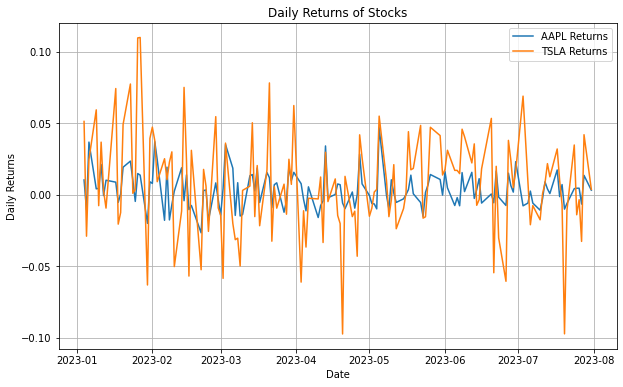

In [60]:
#2-)Plotting Returns of Two Stocks
import yfinance as yf
import matplotlib.pyplot as plt

def plot_daily_returns(stocks, start_date, end_date):
    """
    Scatters the daily returns of multiple stocks.
    
    Parameters:
    stocks (list): List of stock symbols.
    start_date (str): Start date in 'YYYY-MM-DD' format.
    end_date (str): End date in 'YYYY-MM-DD' format.
    """
    # Retrieve historical price data using yfinance
    data = yf.download(stocks, start=start_date, end=end_date)['Adj Close']

    # Calculate daily returns
    returns = data.pct_change()

    # Plot daily returns
    plt.figure(figsize=(10, 6))
    
    for stock in stocks:
        plt.plot(returns.index, returns[stock], label=f'{stock} Returns')

    plt.title('Daily Returns of Stocks')
    plt.xlabel('Date')
    plt.ylabel('Daily Returns')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
stocks_to_plot = ['AAPL', 'TSLA']  # You can add more stock symbols
start_date = '2023-01-01'
end_date = '2023-08-01'
plot_daily_returns(stocks_to_plot, start_date, end_date)


[*********************100%***********************]  3 of 3 completed


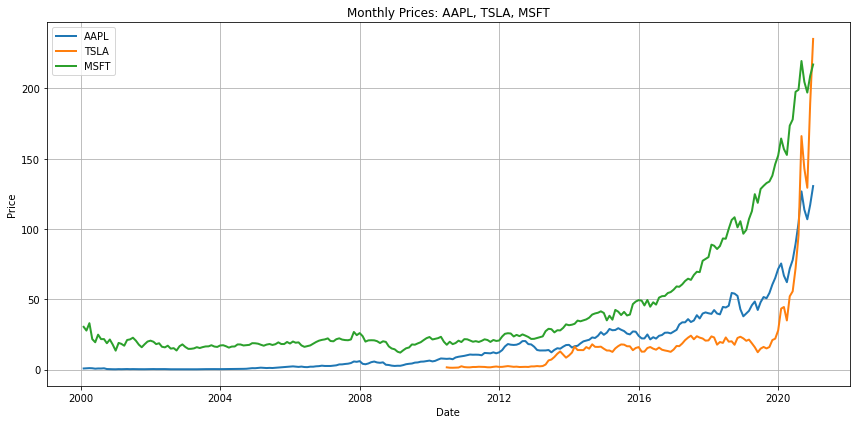

In [61]:
#3-)Plotting Prices of Stocks
import yfinance as yf
import matplotlib.pyplot as plt

def plot_stock_prices(symbols, start_date, end_date):
    """
    Plots the actual monthly prices of stocks.
    
    Parameters:
    symbols (list): List of stock symbols.
    start_date (str): Start date in 'YYYY-MM-DD' format.
    end_date (str): End date in 'YYYY-MM-DD' format.
    """
    # Retrieve historical price data using yfinance
    data = yf.download(symbols, start=start_date, end=end_date)['Adj Close']

    # Resample to monthly data
    monthly_data = data.resample('M').last()

    # Create the plot
    plt.figure(figsize=(12, 6))
    
    for symbol in symbols:
        plt.plot(monthly_data.index, monthly_data[symbol], label=symbol, linewidth=2)

    plt.title('Monthly Prices: {}'.format(', '.join(symbols)))
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Example usage
stocks_to_plot = ['AAPL', 'TSLA', 'MSFT']  # You can add more stock symbols
start_date = '2000-01-01'
end_date = '2021-01-01'
plot_stock_prices(stocks_to_plot, start_date, end_date)


[*********************100%***********************]  4 of 4 completed


<Figure size 864x576 with 0 Axes>

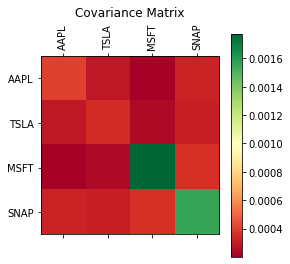

In [74]:
#4-)Plotting Covariance Matrix of Stocks
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

def plot_covariance_matrix(symbols, start_date, end_date):
    """
    Plots the covariance matrix of stocks.
    
    Parameters:
    symbols (list): List of stock symbols.
    start_date (str): Start date in 'YYYY-MM-DD' format.
    end_date (str): End date in 'YYYY-MM-DD' format.
    """
    # Retrieve historical price data using yfinance
    data = yf.download(symbols, start=start_date, end=end_date)['Adj Close']

    # Calculate daily returns
    returns = data.pct_change().dropna()

    # Calculate covariance matrix
    cov_matrix = returns.cov()

    # Create the covariance visualization
    plt.figure(figsize=(12, 8))
    
    plt.matshow(cov_matrix, cmap=plt.cm.RdYlGn)
    plt.colorbar()
    plt.title('Covariance Matrix')
    plt.xticks(range(len(symbols)), symbols, rotation='vertical')
    plt.yticks(range(len(symbols)), symbols)
    plt.show()

# Example usage
stocks_to_plot = ['AAPL', 'TSLA', 'MSFT','SNAP']  # You can add more stock symbols
start_date = '2000-01-01'
end_date = '2021-01-01'
plot_covariance_matrix(stocks_to_plot, start_date, end_date)
